# Coding project - Picture enhancement

Write code that automatically enhances a photograph.

<img src="etretat.jpg" width="250px" />
<img src="ex_enhance.jpg" width="250px" />

"Enhance" may mean a lot of different things, and we encourage you to be creative in which enhancements you want to implement.

Some possibilities include (not an exhaustive list):

* Noise reduction
* Auto-level
* Gamma correction (with gamma provided by the user or automatically determined from the image histogram)
* Increase colour saturation
* ...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread, imshow, imsave
from PIL import Image
from scipy.signal import convolve2d
from skimage.filters import gaussian 
from skimage.filters.rank import mean, median
from skimage.morphology import square, disk
from skimage.feature import canny
from skimage.transform import hough_line, hough_line_peaks, probabilistic_hough_line
import cv2

C:\Users\aprfe\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


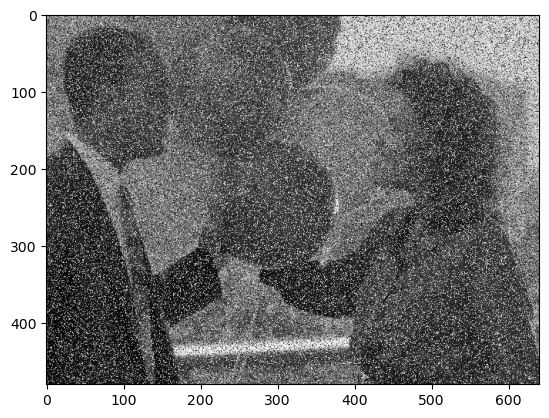

(480, 640)


In [2]:
im= imread("noisy_image.png", as_gray=True)
plt.figure()
plt.imshow(im, cmap=plt.cm.gray)
plt.show()
print(im.shape)

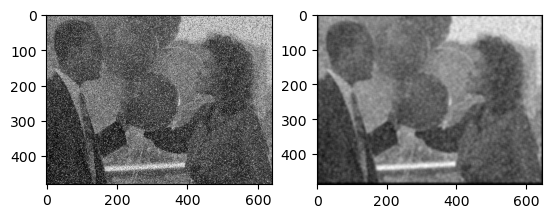

In [3]:
#mean kernel 
ksize = 8
kernel = np.ones((ksize, ksize))
kernel /=kernel.sum()
#kernel is created as an 8x8 matrix filled with ones. This matrix represents the mean kernel.
#The values in the kernel are normalized by dividing each element by the sum of all elements in the kernel. 
#This ensures that the sum of all elements in the kernel is equal to 1.
im_outp = convolve2d(im, kernel)
plt.figure()
plt.gray()
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(im_outp)
plt.show()

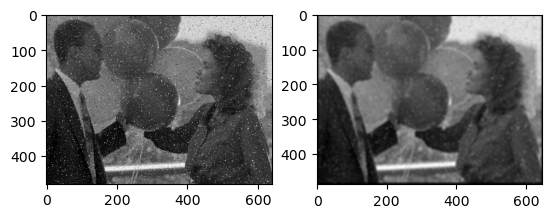

In [4]:
#mean kernel 
ima=imread("balloons.png", as_gray=True)
ksize = 8
kernel = np.ones((ksize, ksize))
kernel /=kernel.sum()
im_outp = convolve2d(ima, kernel)
plt.figure()
plt.gray()
plt.subplot(1,2,1)
plt.imshow(ima)
plt.subplot(1,2,2)
plt.imshow(im_outp)
plt.show()

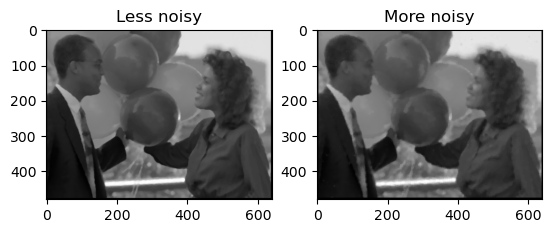

In [5]:
def med(im, ksize):
    im_outp2 = np.zeros(im.shape)
    for y in range(ksize//2, im.shape[0]-ksize//2):
        for x in range(ksize//2, im.shape[1]-ksize//2):
            im_outp2[y, x] = np.median(im[y-ksize//2:y+ksize//2+1, x-ksize//2:x+ksize//2+1])
    return im_outp2
#The function then iterates over the pixels of the input image, and for each pixel, 
#it calculates the median value of the surrounding pixels within a square window of size ksize x ksize.
plt.figure()
plt.gray()
plt.subplot(1,2,1)
plt.title("Less noisy")
plt.imshow(med(ima, 6 ))
plt.subplot(1,2,2)
plt.title("More noisy")
plt.imshow(med(im, 8)) 
plt.show()

C:\Users\aprfe\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3526: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


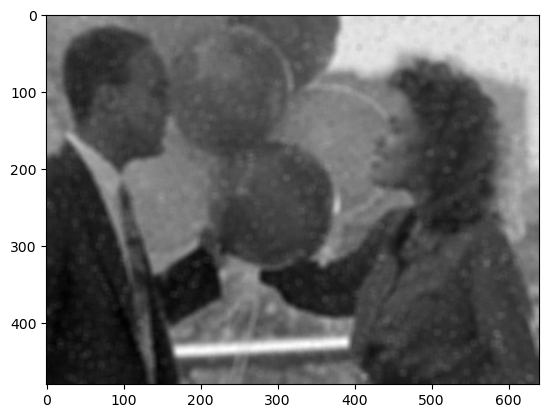

In [6]:
im_outp3 = mean(ima, disk(5))
plt.figure()
plt.gray()
plt.imshow(im_outp3)
plt.show()

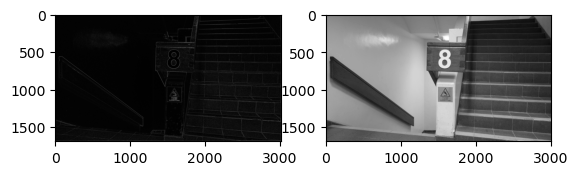

In [7]:
im2 = imread("SonyA7II.jpg", as_gray=True)
def sobel(im2): 
    gy = np.array([[-1.,-2.,-1.], [0.,0.,0.],[1.,2.,1.]])
    gx = gy.T #transpose
    Gy = convolve2d(im2, gy)
    Gx = convolve2d(im2, gx)
#The convolve2d function is used to convolve the input image (im2) with the Sobel filters (gy and gx) separately, 
#resulting in the gradient images Gy and Gx for vertical and horizontal edges, respectively.
    return np.sqrt(Gy**2+Gx**2)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(sobel(im2), cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(im2, cmap=plt.cm.gray)
plt.show()

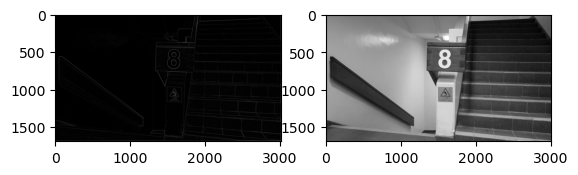

In [8]:
im_m = median(im2, disk(3))
plt.figure()
plt.subplot(1,2,1)
plt.imshow(sobel(im_m), cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(im_m, cmap=plt.cm.gray)
plt.show()

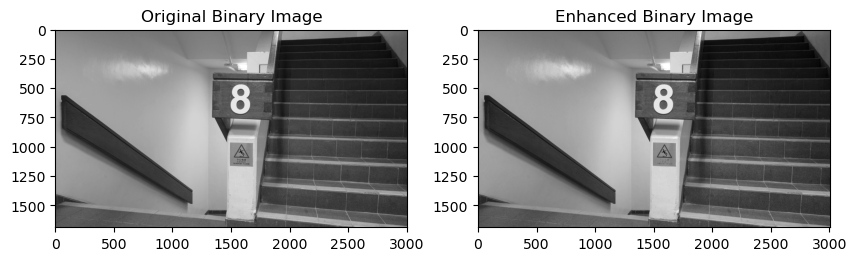

In [9]:
kernel = np.ones((3, 3), np.uint8)
enhanced_image = cv2.morphologyEx(im2, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(im2, cmap='gray')
plt.title('Original Binary Image')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced Binary Image')

plt.show()

np.ones((3, 3), np.uint8) creates a 3x3 matrix of ones with the data type uint8. This matrix is used as a structuring element for the morphological operation.
cv2.morphologyEx is a function from the OpenCV library that performs morphological operations on images.
im2 is the input binary image on which morphological operations will be applied.
cv2.MORPH_CLOSE specifies the morphological operation to be performed, which is closing. Closing is a dilation followed by an erosion operation. It is useful for closing small holes or gaps in the foreground object.

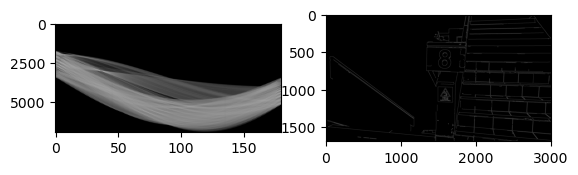

In [18]:
borders = canny(im2, sigma=2)
h, theta, d = hough_line(borders)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.log(h+1), aspect=1/80)
plt.subplot(1,2,2)
plt.imshow(canny(im2, sigma=2), cmap=plt.cm.gray)
plt.show()

(8,)
(8,)
(8,)


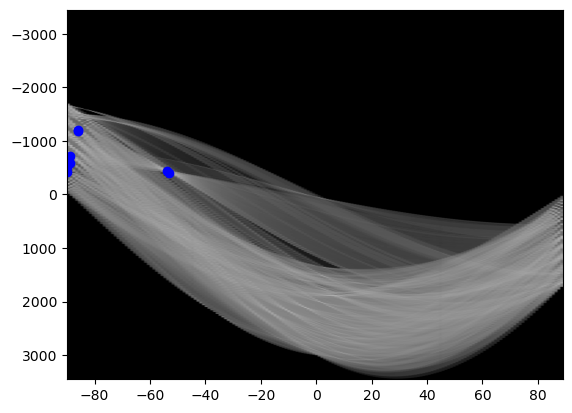

In [11]:
hpeaks, angles, dists = hough_line_peaks(h, theta, d)
print(hpeaks.shape)
print(angles.shape)
print(dists.shape)
plt.figure()
plt.imshow(np.log(h+1), aspect='auto', extent = [np.rad2deg(theta[0]), np.rad2deg(theta[-1]), d[-1], d[0]])
plt.plot(np.rad2deg(angles), dists, 'bo')
plt.show()

hough_line_peaks is a function, likely from the skimage.transform module, that extracts peaks from the Hough accumulator array. This array, h, is generated by the Hough transform.
h is the Hough accumulator array containing information about detected lines.
theta represents the angles at which the lines are detected, and d represents the distances from the origin to the lines.
The function returns three arrays:

hpeaks: The row indices of the peaks in the Hough accumulator array.
angles: The angles corresponding to the detected lines.
dists: The distances from the origin to the detected lines.

Plots the logarithm (with a small offset to avoid log(0)) of the Hough accumulator array using imshow. The aspect='auto' parameter adjusts the aspect ratio of the plot. The extent parameter sets the extent of the plot based on the angle and distance ranges.

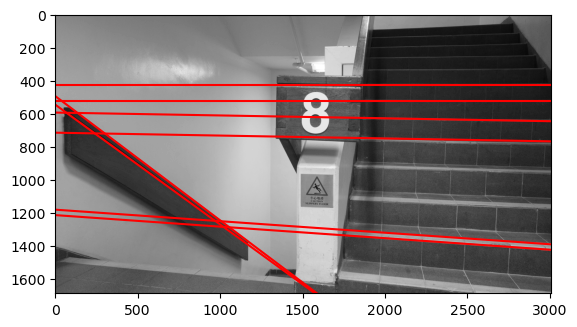

In [12]:
plt.figure()
plt.imshow(im2, cmap=plt.cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)): 
    # The zip(*...) syntax is used to iterate over these peaks.
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - im2.shape[1] * np.cos(angle)) / np.sin(angle)
    #For each detected line, the code computes the y-coordinates (y0 and y1) 
    #of the two endpoints of the line using the Hough parameters (angle and distance).
    plt.plot((0, im2.shape[1]), (y0, y1), '-r')
plt.xlim([0, im2.shape[1]])
plt.ylim([im2.shape[0],0])
plt.show()
#Sets the x-axis limits to be between 0 and the width of the image (im2.shape[1]), 
#and the y-axis limits to be between the height of the image and 0.

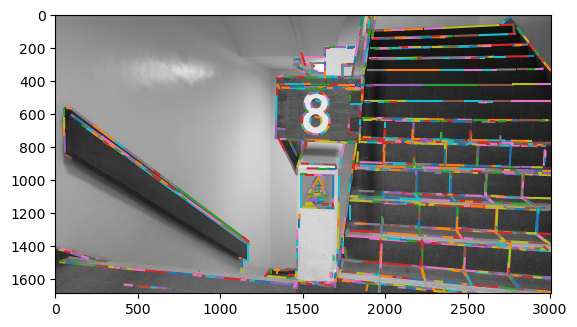

In [13]:
lines = probabilistic_hough_line(borders, threshold=10, line_length=20, line_gap=8)
plt.figure()
plt.imshow(im2, cmap=plt.cm.gray)
for line in lines:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]))
plt.show()

#Iterates over the list of detected line segments (lines).
#For each line segment, it extracts the two endpoints (p0 and p1) 
#and plots a line connecting these two points on the figure.

borders is the binary image on which the transform is applied.
The threshold parameter specifies the minimum number of votes (points) required for a line to be considered.
line_length is the minimum length of a line to be considered.
line_gap is the maximum gap allowed between connected line segments.
The function returns a list of line segments, where each line segment is represented by two points (p0, p1).

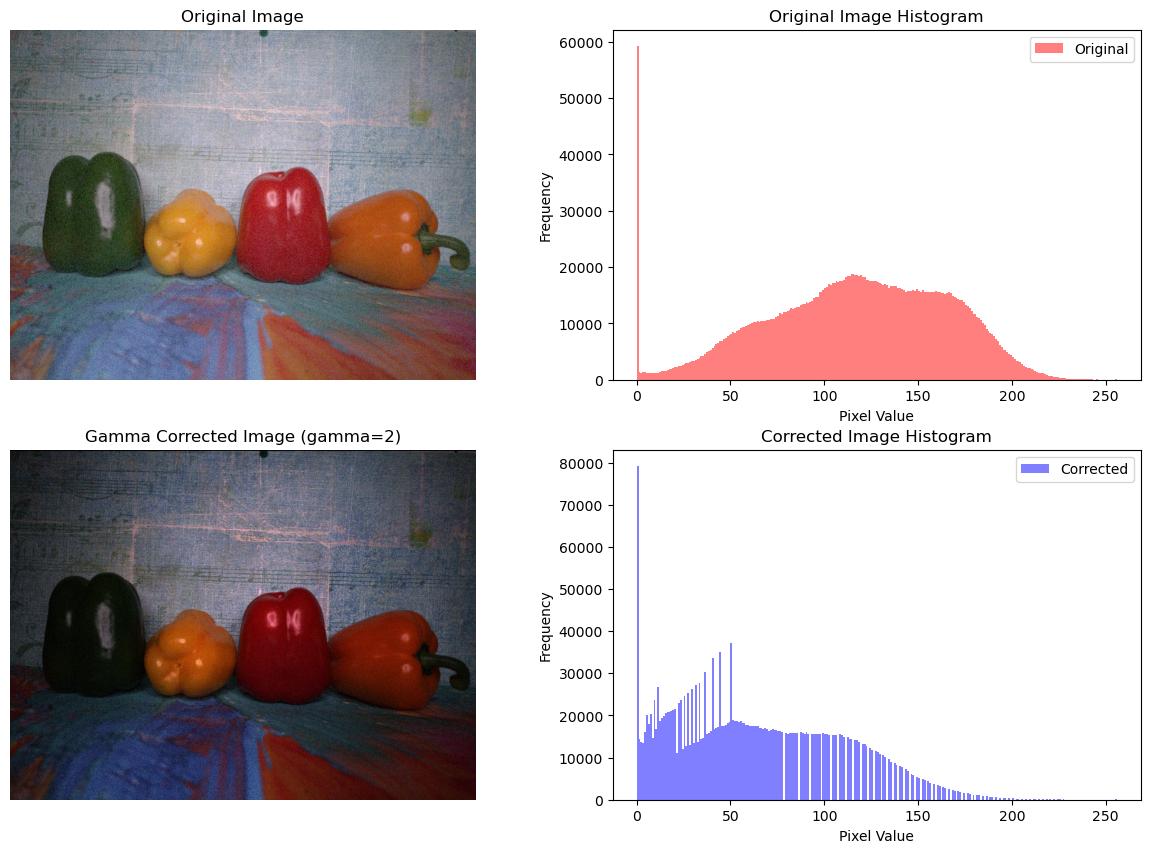

In [32]:
def apply_gamma_correction_and_display(image_path, gamma=1.0):
    img = Image.open(image_path)
    img_array = np.array(img)
    corrected_array = np.power(img_array / 255.0, gamma) * 255.0
    corrected_array = np.clip(corrected_array, 0, 255)
    plt.figure(figsize=(15, 10))
#Performs gamma correction on the image array. 
#The pixel values are scaled to the range [0, 1], raised to the power of the specified gamma value, and then scaled back to the range [0, 255]. 
#The resulting array is clipped to ensure that pixel values are within the valid range.
    
    # Original image
    plt.subplot(2, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Original image histogram
    plt.subplot(2, 2, 2)
    plt.hist(img_array.flatten(), bins=256, range=(0, 256), color='r', alpha=0.5, label='Original')
    plt.title('Original Image Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()

    # Corrected image
    plt.subplot(2, 2, 3)
    plt.imshow(corrected_array.astype(np.uint8))
    plt.title('Gamma Corrected Image (gamma={})'.format(gamma))
    plt.axis('off')

    # Corrected image histogram
    plt.subplot(2, 2, 4)
    plt.hist(corrected_array.flatten(), bins=256, range=(0, 256), color='b', alpha=0.5, label='Corrected')
    plt.title('Corrected Image Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()

    plt.show()

input_image_path = 'pimentos.png'

gamma_value_manual = 2

apply_gamma_correction_and_display(input_image_path, gamma_value_manual)

Gamma value: 1.0178641482037976


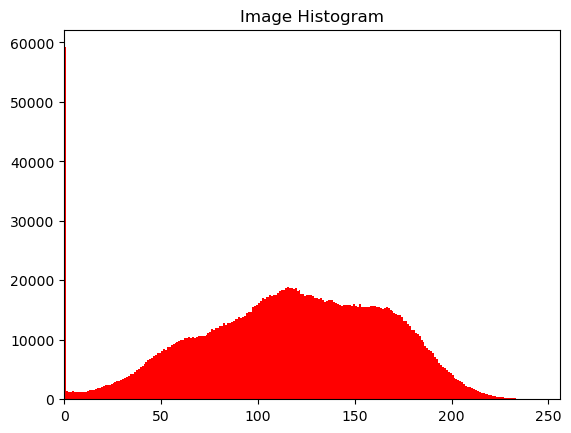

Gamma value: 1.0178641482037976


In [15]:
def calculate_gamma(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #Computes the histogram of the grayscale image using NumPy's histogram function.
    hist, bins = np.histogram(gray_image.flatten(), 256, [0, 256])
    #normalize the hist
    norm_hist = hist / np.sum(hist)
    #Computes the cumulative distribution function (CDF) of the normalized histogram using NumPy's cumsum function.
    cdf = np.cumsum(norm_hist)
    #Finds the index of the first element in the CDF that is greater than or equal to 0.5, effectively locating the midpoint.
    midpoint = np.argmax(cdf >= 0.5)

    gamma = np.log(0.5) / np.log(cdf[midpoint])

    return gamma

image_path = 'pimentos.png'
image = cv2.imread(image_path)

gamma_value = calculate_gamma(image)

print(f"Gamma value: {gamma_value}")

# Plot the image histogram
plt.hist(image.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.title('Image Histogram')
plt.show()

print(f"Gamma value: {gamma_value}")

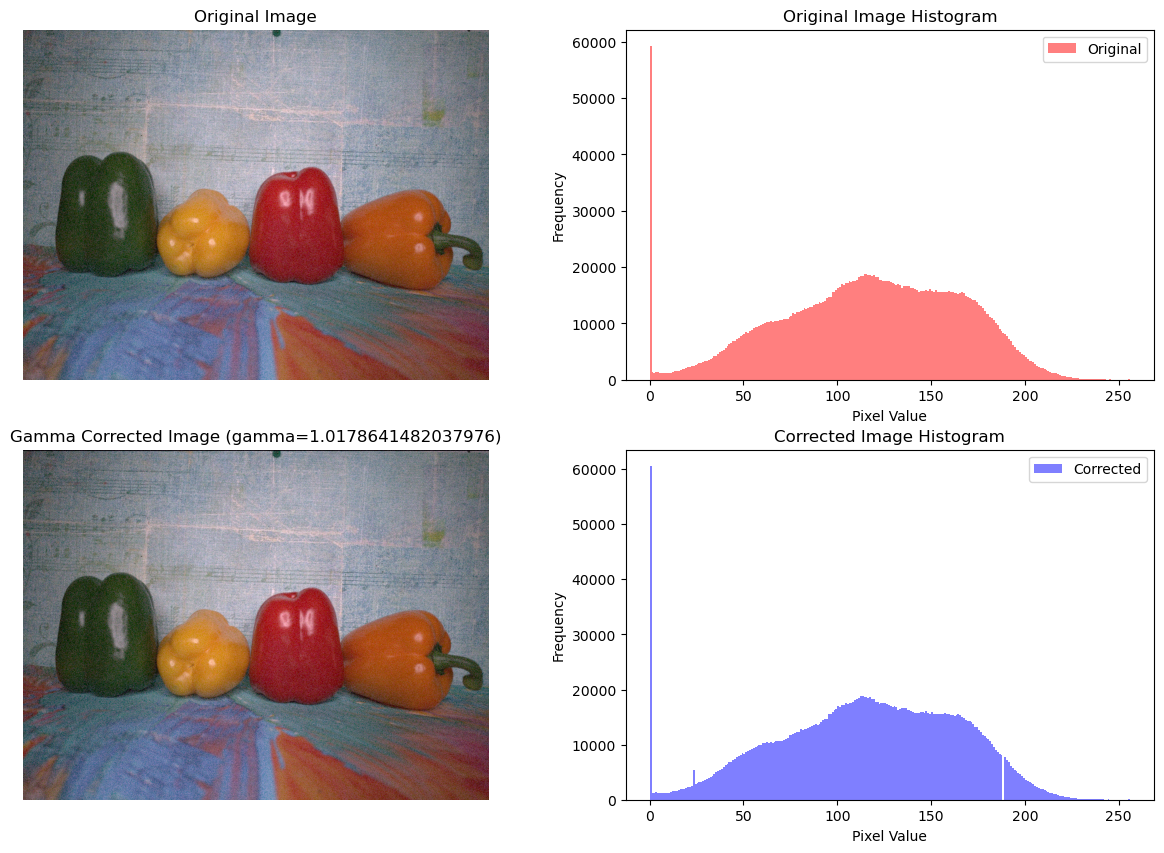

In [16]:
def apply_gamma_correction_and_display(image_path, gamma=gamma_value):
    img = Image.open(image_path)

    img_array = np.array(img)

    corrected_array = np.power(img_array / 255.0, gamma) * 255.0

    corrected_array = np.clip(corrected_array, 0, 255)

    plt.figure(figsize=(15, 10))

    # Original image
    plt.subplot(2, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Original image histogram
    plt.subplot(2, 2, 2)
    plt.hist(img_array.flatten(), bins=256, range=(0, 256), color='r', alpha=0.5, label='Original')
    plt.title('Original Image Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()

    # Corrected image
    plt.subplot(2, 2, 3)
    plt.imshow(corrected_array.astype(np.uint8))
    plt.title('Gamma Corrected Image (gamma={})'.format(gamma))
    plt.axis('off')

    # Corrected image histogram
    plt.subplot(2, 2, 4)
    plt.hist(corrected_array.flatten(), bins=256, range=(0, 256), color='b', alpha=0.5, label='Corrected')
    plt.title('Corrected Image Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

input_image_path = 'pimentos.png'

apply_gamma_correction_and_display(input_image_path, gamma_value)

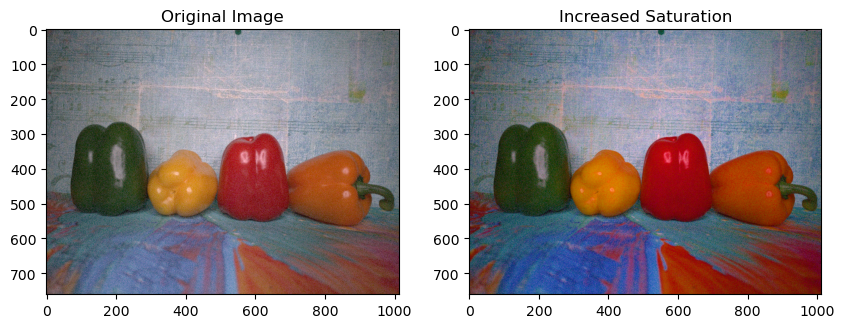

In [34]:
def increase_saturation(image_path, factor=1.5):
    img = cv2.imread(image_path)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

    img_hsv[:, :, 1] = np.clip(img_hsv[:, :, 1] * factor, 0, 255)
    #Modifies the saturation channel of the image by multiplying it with the specified factor. 
    #The np.clip function ensures that the saturation values stay within the valid range [0, 255].
    img_saturated = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(img_saturated)
    plt.title('Increased Saturation')

    plt.show()

image_path = 'pimentos.png'
increase_saturation(image_path, factor=1.9)